In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp

In [17]:
mobile_chg_dchg = pd.read_csv('mobile_charge_discharge_time.csv',sep=",",header=None)

In [18]:
mobile_chg_dchg.shape

(100, 2)

In [19]:
mobile_chg_dchg.head(10)

,0,1
0,2.81,5.62
1,7.14,8.00
2,2.72,5.44
3,3.87,7.74
4,1.90,3.80
5,7.82,8.00
6,7.02,8.00
7,5.50,8.00
8,9.15,8.00
9,4.87,8.00


In [20]:
mobile_chg_dchg.describe()

,0,1
count,100.000000,100.000000
mean,4.573000,6.206800
std,2.788603,2.454116
min,0.000000,0.000000
25%,1.987500,3.975000
50%,4.375000,8.000000
75%,6.522500,8.000000
max,11.720000,8.000000


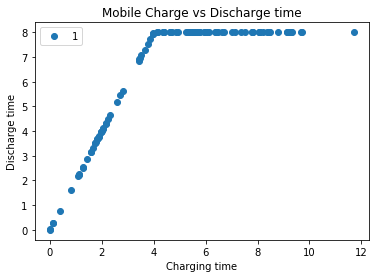

In [21]:
mobile_chg_dchg.plot(x=0, y=1, style = 'o')
mp.title('Mobile Charge vs Discharge time')
mp.xlabel('Charging time')
mp.ylabel('Discharge time')
mp.show()

In [22]:
X = mobile_chg_dchg.iloc[:,0].values  
Y = mobile_chg_dchg.iloc[:,1].values  

In [23]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

In [24]:
from sklearn.linear_model import LinearRegression  
linearReg = LinearRegression()  
linearReg.fit(X_train.reshape(-1,1), Y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
print(linearReg.intercept_)  
b = linearReg.intercept_

2.833021060740887


In [26]:
print(linearReg.coef_)  
a = linearReg.coef_

[0.71507608]


In [27]:
Y_pred = linearReg.predict(X_test.reshape(-1,1))  

In [28]:
accuracy = pd.DataFrame({'Charging time': X_test, 'Actual Discharge time': Y_test, 'Predicted Discharge time': Y_pred})  
accuracy

,Charging time,Actual Discharge time,Predicted Discharge time
0,6.39,8.00,7.402357
1,1.58,3.16,3.962841
2,2.72,5.44,4.778028
3,7.53,8.00,8.217544
4,8.79,8.00,9.118540
5,3.97,7.94,5.671873
6,0.80,1.60,3.405082
7,4.11,8.00,5.771984
8,4.39,8.00,5.972205
9,4.38,8.00,5.965054


In [29]:
print('Enter !exit! to quit the program..')
print('Enter Charging time..')
chargingtime = input()
while chargingtime.lower() != 'exit':
    dischargeTime = b + (a * float(chargingtime))
    print('\n', 'Predicted Discharge time = ', round(float(dischargeTime),2))
    print('\n', 'Enter Charging time..')
    chargingtime = input()
    
print('\n', 'Quitting program...')

Enter !exit! to quit the program..
Enter Charging time..
6.37

 Predicted Discharge time =  7.39

 Enter Charging time..
0.14

 Predicted Discharge time =  2.93

 Enter Charging time..
exit

 Quitting program...
